# EXERCISE 5

## Assessing the distribution of schools in the Helsinki region

Different areas and neighbourhoods in the Helsinki region have different levels of wealth, and investment by the administration is not necessarily proportional across the board. Some neighbourhoods might see more funds allocated to them while others might suffer from more administrative neglect. One area where this could be seen is the access to educational facilities such as schools in different neighbourhoods. Neglected neighbourhoods are expected to have less schools on a per capita basis than other neighbourhoods. In this exercise I will try to map on a population grid 

In [58]:
import pandas as pd
import geopandas as gpd
import requests
import os
from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt
import contextily as ctx

In [21]:
os.getcwd() 
os.chdir("/home/jovyan/work/autogis/exercises/exercise-5-NicoOrdax/")

In [22]:
os.getcwd()

'/home/jovyan/work/autogis/exercises/exercise-5-NicoOrdax'

First we import the data on the locations of our schools. The data come from Paituli (https://avaa.tdata.fi/web/paituli/latauspalvelu) and consist of point data in a shapefile with every school being one point. There might also be additional information, which we will have to explore. The file contains information on all the finnish schools so we might have to clip it to the Helsinki region.

In [99]:
# Reading data on the schools
fp = r"data/oppilaitokset_2017.shp"
schools = gpd.read_file(fp)

# Exploring the data
print(len(schools))
print(schools.head())
print(schools["oltyp_nimi"].unique())

2812
                          onimi oltyp   oltyp_nimi  \
0              Aapiskujan koulu    11  Peruskoulut   
1            Aarnivalkean koulu    11  Peruskoulut   
2     Adv.kirkon Kopun ala-aste    11  Peruskoulut   
3  Adv.kirkon Siikasalmen koulu    11  Peruskoulut   
4                   Ahjon koulu    11  Peruskoulut   

                         geometry  
0  POINT (340457.000 7007583.000)  
1  POINT (377549.000 6674307.000)  
2  POINT (350507.000 6692919.000)  
3  POINT (621465.000 6933971.000)  
4  POINT (397507.000 6697358.000)  
['Peruskoulut' 'Peruskouluasteen erityiskoulut' 'Lukiot'
 'Perus- ja lukioasteen koulut']


In [100]:
# Checking the CRS of the layer

# First I check the type of the CRS object
print(type(schools.crs))

# Now I want to check the EPSG code and transform it so that I can work more easily 
print(schools.crs.to_epsg())
schools.crs = schools.crs.to_epsg()

# Checking that it worked
print(schools.crs)

<class 'pyproj.crs.crs.CRS'>
3067
epsg:3067


As we see the dataset contains data on the name of our schools, the location and the type of schools. There are 4 types of schools in the dataset. Primary schools, secondary schools, primary and secondary schools and finally special schools. The CRS of the data set is ETRS89_TM35_FIN_E_N, which corresponds to epsg 3067.

In [102]:
clip = Polygon([(370000, 6600000), (400000,6600000), (370000, 6700000), (400000, 6700000)])


In [103]:
schools  = schools[schools["geometry"].within(clip)]
schools

,onimi,oltyp,oltyp_nimi,geometry
4,Ahjon koulu,11,Peruskoulut,POINT (397507.000 6697358.000)
43,Aleksis Kiven peruskoulu,11,Peruskoulut,POINT (386387.000 6674122.000)
47,Ali-Keravan koulu,11,Peruskoulut,POINT (396169.000 6697215.000)
48,Alppilan lukio,15,Lukiot,POINT (383573.000 6677849.000)
60,Apollon yhteiskoulu,19,Perus- ja lukioasteen koulut,POINT (381346.000 6680644.000)
...,...,...,...,...
2656,Vierumäen koulu,11,Peruskoulut,POINT (392744.000 6692758.000)
2757,Yhtenäiskoulu,11,Peruskoulut,POINT (385893.000 6677069.000)
2780,Ylästön koulu,11,Peruskoulut,POINT (384361.000 6684711.000)
2791,Zacharias Topeliusskolan,11,Peruskoulut,POINT (384251.000 6674149.000)


epsg:3067


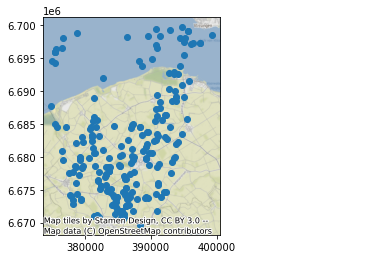

In [107]:
# Reprojecting the school data to EPSG:3857 to add basemap
schools.to_crs("EPSG:3587")
schools.crs
print(schools.crs)

fig, ax = plt.subplots()
schools.plot(ax = ax)
ctx.add_basemap(ax)